<a href="https://colab.research.google.com/github/bn-pessoa/Contador-de-letra-no-texto/blob/main/teste_spark_BEATRIZ_PESSOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# `Instruções para o teste`

## ⚠️ Importante

Antes de iniciar, não esqueça de renomear esse documento substituindo o texto **SEU_NOME** no título com o nome de quem for resolver.

Deixe as respostas bem sinalizadas e comentadas e mencionando a qual questão se refere.

Fique à vontade para utilizar quantas células forem necessárias.

<br><br>

## 📖 Recursos Permitidos
✅ Documentação, sites, fóruns  
❌ Inteligências Artificiais (ChatGPT, Claude, etc.)

<br><br>

## 📤 Instruções para Entrega

**Ao finalizar o teste** volte a este passo e execute a célula abaixo.

**Envie o arquivo gerado e o arquivo do seu notebook para o e-mail:** `mateus.camacho@tdwbi.com.br`

- Arquivo gerado: `historico_exec.txt` <br>
- Seu notebook: `teste_spark_SEU_NOME.ipynb`


In [62]:
### IMPORTANDO ARQUIVOS QUE SERÃO USADOS NO TESTE ###

!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/products.json -O products.json
!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/sales.csv -O sales.csv
!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/users.csv -O users.csv

path_products = "/content/products.json"
path_sales = "/content/sales.csv"
path_users = "/content/users.csv"

--2025-08-11 19:54:09--  https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/products.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3186 (3.1K) [text/plain]
Saving to: ‘products.json’

products.json       100%[===================>]   3.11K  --.-KB/s    in 0s      

2025-08-11 19:54:09 (38.8 MB/s) - ‘products.json’ saved [3186/3186]

--2025-08-11 19:54:09--  https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24411 (24K) [text/plain]


---

# `Questões e Contexto`

## 📁 Contexto

No diretório raiz desse documento, existem os três arquivos que serão necessários para a conclusão dessa atividade. Em caso de dúvidas, a pasta de se encontra no desktop dessa máquina na pasta 'pyspark_test'.

Os dados são fictícios e compreendem uma simulação de um cenário de uma loja de departamentos, para isso temos os arquivos com as seguintes informações:
- **users.csv** → Dados dos clientes/usuários da loja
- **sales.csv** → Dados das vendas
- **products.json** → Dados de cadastro dos produtos

<br><br>

## 📝 Questões

A atividade consiste nas questões a seguir:

**1.** Declare um novo dataframe que mostre o nome do produto e o valor final da compra.

**2.** Declare um novo dataframe com o valor total gasto por cliente.

**3.** Declare um novo dataframe com os cinco melhores clientes contendo o nome, e-mail e o valor gasto em todo o período.

**4.** Declare um novo dataframe com os cinco produtos mais vendidos nos últimos seis meses (considerando período de dados disponível nos arquivos) contendo o nome do produto e a quantidade de produtos vendidos nesse período.

**5.** Calcular a média de faturamento por cliente e o desvio padrão.

**6.** Classificar os clientes em três categorias: silver, gold, platinum
- **platinum:** clientes que gastaram mais que a média de faturamento por cliente;
- **gold:** clientes que gastaram do menor desvio padrão até a média de faturamento por cliente;
- **silver:** clientes que gastaram no máximo a média menos o desvio padrão do faturamento por cliente;

**7.** Salvar um arquivo parquet com os três produtos mais consumidos de cada categoria do cliente.

---

# `Configuração do ambiente`

**Execute as células abaixo antes de iniciar o teste.**

Os arquivos serão criados automaticamente e estarão disponíveis no ícone de pasta do menu lateral (conforme imagem abaixo) ou na pasta **content**.

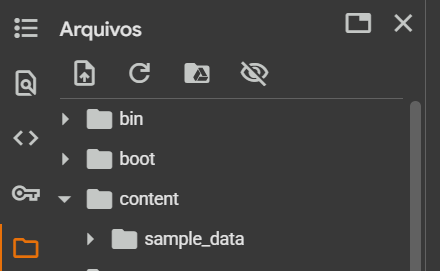


In [25]:
### IMPORTANDO BIBLIOTECAS NECESSÁRIAS ###

from pyspark.sql import SparkSession
from pyspark.sql import *

In [26]:
### INSTANCIANDO SPARK ###

spark = SparkSession.builder.appName('test-spark').getOrCreate()

---

# Seu teste começa aqui 🍀 Boa sorte!

In [27]:
products_df = spark.read.json("/content/products.json").show(10)
sales_df = spark.read.csv(path_sales, header=True, inferSchema=True).show(10)
users_df = spark.read.csv(path_users, header=True, inferSchema=True).show(10)

+-------+--------------------+----------+
|  price|             product|product_id|
+-------+--------------------+----------+
| $86.50|         Camisa Polo|         1|
|$112.11|         Calça Jeans|         2|
|$100.19|    Vestido de Verão|         3|
| $82.38|     Tênis Esportivo|         4|
|$101.50|     Camiseta Básica|         5|
|$108.01|           Saia Midi|         6|
|$100.37|Blusa de Manga Longa|         7|
|$122.81|Sapatos de Salto ...|         8|
|$116.02|       Jaqueta Jeans|         9|
|$117.15|      Bolsa de Couro|        10|
+-------+--------------------+----------+
only showing top 10 rows

+-------+----------+----------+---------+----+
|sale_id|      date|product_id|client_id|qtde|
+-------+----------+----------+---------+----+
|      1|13/06/2022|        30|      223|   2|
|      2|16/11/2022|        23|      175|   2|
|      3|18/08/2022|        29|      184|   2|
|      4|13/03/2022|        31|      194|   1|
|      5|14/12/2022|        13|      221|   2|
|      6|1



---


Q1. Declare um novo dataframe que mostre o nome do produto e o valor final da
compra.


---



In [51]:
spark = SparkSession.builder.appName("q1-add-cols").getOrCreate()

BASE = "/content/sample_data"
path_sales    = f"{BASE}/sales.csv"
path_products = f"{BASE}/products.json"

sales_df = (spark.read
            .option("header", True).option("inferSchema", True)
            .csv(path_sales))

schema_prod = T.StructType([
    T.StructField("product_id", T.LongType(), True),
    T.StructField("product",    T.StringType(), True),
    T.StructField("price",      T.StringType(), True),
])

raw = spark.read.text(path_products)

clean = (raw
         .select(F.regexp_replace(F.col("value"), r"\s*,\s*$", "").alias("json_line"))
         .filter(F.length("json_line") > 0))

products_df = (clean
               .select(F.from_json("json_line", schema_prod).alias("j"))
               .select("j.*"))

products_df = products_df.withColumn(
    "price_num",
    F.regexp_replace(F.col("price").cast("string"), r"[^0-9.]", "").cast("double")
)

sales_df = sales_df.withColumn("qtde_num", F.col("qtde").cast("double"))

sales_enriched = (sales_df.alias("s")
    .join(products_df.select("product_id", F.col("product").alias("product_name"), "price_num").alias("p"),
          on=[F.col("s.product_id") == F.col("p.product_id")],
          how="left")
    .withColumn("final_value", F.col("qtde_num") * F.col("price_num"))
    .select("s.*", "product_name", "final_value")
)


sales_enriched.show(20, truncate=False)


+-------+----------+----------+---------+----+--------+------------------+-----------+
|sale_id|date      |product_id|client_id|qtde|qtde_num|product_name      |final_value|
+-------+----------+----------+---------+----+--------+------------------+-----------+
|1      |13/06/2022|30        |223      |2   |2.0     |Blusa Cropped     |214.5      |
|2      |16/11/2022|23        |175      |2   |2.0     |Camiseta Estampada|218.38     |
|3      |18/08/2022|29        |184      |2   |2.0     |Óculos de Sol     |244.54     |
|4      |13/03/2022|31        |194      |1   |1.0     |Bolsa Tote        |105.96     |
|5      |14/12/2022|13        |221      |2   |2.0     |Camisa Social     |161.52     |
|6      |18/01/2022|26        |206      |1   |1.0     |Conjunto de Pijama|85.49      |
|7      |12/10/2022|28        |123      |2   |2.0     |Camiseta Polo     |224.04     |
|8      |15/06/2022|39        |269      |2   |2.0     |Macaquinho        |191.32     |
|9      |15/02/2022|36        |179      |3 


---


Q2 .Declare um novo dataframe com o valor total gasto por cliente.


---



In [41]:
q2_df = (sales_enriched
         .groupBy("client_id")
         .agg(F.sum("final_value").alias("total_spent"))
         .orderBy("total_spent")
)

q2_df.show(20, truncate=False)


+---------+-----------+
|client_id|total_spent|
+---------+-----------+
|80       |82.64      |
|141      |82.64      |
|76       |85.49      |
|294      |95.66      |
|197      |102.7      |
|214      |105.47     |
|77       |108.96     |
|287      |110.27     |
|70       |110.91     |
|171      |112.08     |
|278      |112.08     |
|254      |112.11     |
|253      |119.44     |
|196      |123.33     |
|208      |124.17     |
|65       |124.43     |
|37       |165.74     |
|216      |183.88     |
|135      |185.68     |
|156      |191.32     |
+---------+-----------+
only showing top 20 rows





---


Q3. Declare um novo dataframe com os cinco melhores clientes contendo o nome, e-mail e o valor gasto em todo o período.


---



In [57]:
users_df = (spark.read
            .option("header", True).option("inferSchema", True)
            .csv(path_users))

if "q2_df" not in globals():
    q2_df = (sales_enriched
             .groupBy("client_id")
             .agg(F.sum("final_value").alias("total_spent")))

top5_clients = (q2_df
    .join(users_df.select("client_id", "name", "email"), on="client_id", how="left")
    .orderBy(F.col("total_spent").desc())
    .limit(5)
    .select("name", "email", "total_spent")
)

top5_clients.show(truncate=False)


+-----------------+-------------------------+------------------+
|name             |email                    |total_spent       |
+-----------------+-------------------------+------------------+
|Randa Friedenbach|rfriedenbach3m@paypal.com|2240.51           |
|Giuditta Blease  |gblease6s@friendfeed.com |1902.85           |
|Cher Higford     |chigfordn@issuu.com      |1843.35           |
|Keen Juggings    |kjuggings5j@phoca.cz     |1795.8600000000001|
|Alfie Pattlel    |apattlelu@discuz.net     |1755.6            |
+-----------------+-------------------------+------------------+





---


Q4. Declare um novo dataframe com os cinco melhores clientes contendo o nome, e-mail e o valor gasto em todo o período.


---



In [53]:
q2_df = (sales_enriched
         .groupBy("client_id")
         .agg(F.sum("final_value").alias("total_spent")))

top5_clients = (q2_df
    .join(users_df.select("client_id", "name", "email"), on="client_id", how="left")
    .orderBy(F.col("total_spent").desc())
    .limit(5)
)

top5_clients.show(truncate=False)


+---------+------------------+-----------------+-------------------------+
|client_id|total_spent       |name             |email                    |
+---------+------------------+-----------------+-------------------------+
|131      |2240.51           |Randa Friedenbach|rfriedenbach3m@paypal.com|
|245      |1902.85           |Giuditta Blease  |gblease6s@friendfeed.com |
|24       |1843.35           |Cher Higford     |chigfordn@issuu.com      |
|200      |1795.8600000000001|Keen Juggings    |kjuggings5j@phoca.cz     |
|31       |1755.6            |Alfie Pattlel    |apattlelu@discuz.net     |
+---------+------------------+-----------------+-------------------------+





---


Q5. Calcular a média de faturamento por cliente e o desvio padrão.


---



In [59]:
from pyspark.sql import functions as F

q5_df = (sales_enriched
         .groupBy("client_id")
         .agg(
             F.round(F.mean("final_value"), 2).alias("avg_revenue"),
             F.round(F.stddev("final_value"), 2).alias("stddev_revenue")
         )
)

q5_df.show(truncate=False)


+---------+-----------+--------------+
|client_id|avg_revenue|stddev_revenue|
+---------+-----------+--------------+
|148      |102.63     |18.07         |
|243      |140.14     |43.61         |
|31       |292.6      |51.72         |
|137      |208.27     |108.55        |
|251      |279.18     |70.45         |
|85       |344.46     |39.67         |
|65       |124.43     |NULL          |
|53       |291.95     |40.99         |
|255      |197.84     |66.93         |
|133      |277.0      |67.73         |
|296      |157.42     |73.28         |
|78       |180.13     |71.8          |
|155      |243.69     |17.8          |
|108      |179.62     |164.88        |
|211      |236.15     |64.3          |
|34       |170.38     |78.72         |
|193      |124.68     |42.5          |
|126      |147.34     |94.34         |
|101      |196.15     |114.48        |
|115      |201.18     |NULL          |
+---------+-----------+--------------+
only showing top 20 rows





---


Q6. Classificar os clientes em três categorias: silver, gold, platinum.

---




In [50]:
total_by_client = (sales_enriched
                   .groupBy("client_id")
                   .agg(F.sum("final_value").alias("total_spent")))

stats = total_by_client.agg(
    F.mean("total_spent").alias("global_avg"),
    F.stddev("total_spent").alias("global_stddev")
).collect()[0]

global_avg = stats["global_avg"]
global_stddev = stats["global_stddev"]

print(f"Media global: {global_avg:.2f}")
print(f"Desvio padrao: {global_stddev:.2f}")

classified_clients = (total_by_client
    .withColumn(
        "category",
        F.when(F.col("total_spent") > global_avg, "platinum")
         .when(
             (F.col("total_spent") >= global_avg - global_stddev) &
             (F.col("total_spent") <= global_avg), "gold"
         )
         .otherwise("silver")
    )
)

classified_clients.show(truncate=False)


Media global: 707.26
Desvio padrao: 414.34
+---------+------------------+--------+
|client_id|total_spent       |category|
+---------+------------------+--------+
|148      |307.88            |gold    |
|243      |280.28            |silver  |
|31       |1755.6            |platinum|
|137      |624.8199999999999 |gold    |
|251      |837.55            |platinum|
|85       |688.92            |gold    |
|65       |124.43            |silver  |
|53       |1751.6699999999998|platinum|
|255      |791.3599999999999 |platinum|
|133      |1107.99           |platinum|
|296      |787.0799999999999 |platinum|
|78       |1260.94           |platinum|
|155      |974.77            |platinum|
|108      |538.87            |gold    |
|211      |708.44            |platinum|
|34       |851.9             |platinum|
|193      |374.04            |gold    |
|126      |884.0600000000001 |platinum|
|101      |1176.8899999999999|platinum|
|115      |201.18            |silver  |
+---------+------------------+-------



---


Q7. Salvar um arquivo parquet com os três produtos mais consumidos de cada categoria do cliente.


---



In [49]:
sales_with_cat = (sales_enriched
    .join(classified_clients.select("client_id", "category"), on="client_id", how="left")
)

prod_by_cat = (sales_with_cat
    .groupBy("category", "product_name")
    .agg(F.sum("qtde").alias("total_qty"))
)

window_cat = Window.partitionBy("category").orderBy(F.col("total_qty").desc())

ranked_products = prod_by_cat.withColumn("rank", F.row_number().over(window_cat))

top3_products_per_cat = ranked_products.filter(F.col("rank") <= 3)

output_path = "/content/sample_data/top3_products_per_category.parquet"
top3_products_per_cat.write.mode("overwrite").parquet(output_path)

print(f"Arquivo salvo em: {output_path}")

top3_products_per_cat.show(truncate=False)


Arquivo salvo em: /content/sample_data/top3_products_per_category.parquet
+--------+---------------------+---------+----+
|category|product_name         |total_qty|rank|
+--------+---------------------+---------+----+
|gold    |Casaco de Inverno    |26       |1   |
|gold    |Cinto de Couro       |26       |2   |
|gold    |Camisa Xadrez        |23       |3   |
|platinum|Blusa de Manga Longa |57       |1   |
|platinum|Mochila de Lona      |52       |2   |
|platinum|Calça Cintura Alta   |45       |3   |
|silver  |Macaquinho           |7        |1   |
|silver  |Sapatos de Salto Alto|6        |2   |
|silver  |Vestido Midi         |5        |3   |
+--------+---------------------+---------+----+



In [64]:
### EXECUTE ESTA CÉLULA APENAS AO FINAL DO TESTE ###

%history -t /content/historico_exec.txt
from google.colab import files
files.download('/content/historico_exec.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>